<a href="https://colab.research.google.com/github/art-lmk/Diabetes-Prediction-using-Simple-Linear-Regression-/blob/main/Diabetes_Prediction_using_a_single_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # just to find patterns within our model
from sklearn.linear_model import LinearRegression # just to find patterns within our model
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')



In [22]:
# 2. Load and Explore the Data
df = pd.read_csv('diabetes.csv')
print("Let's see what's in the file!")
print(df)




Let's see what's in the file!
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

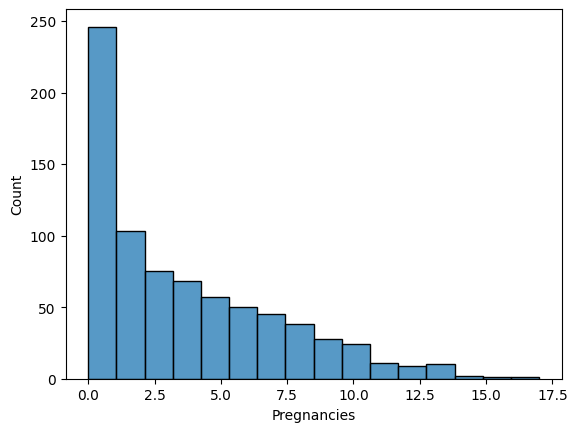

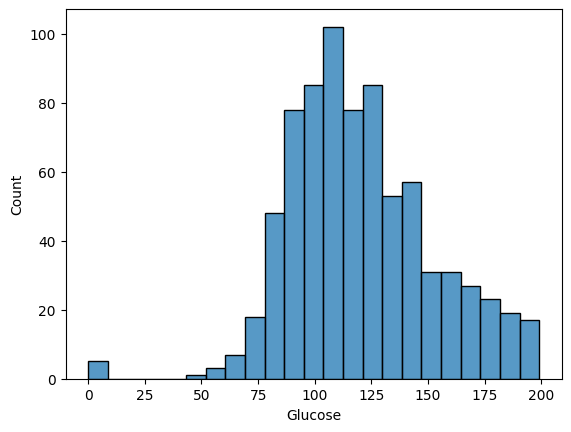

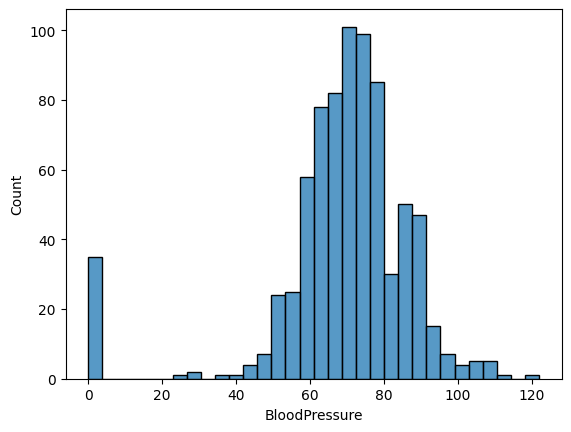

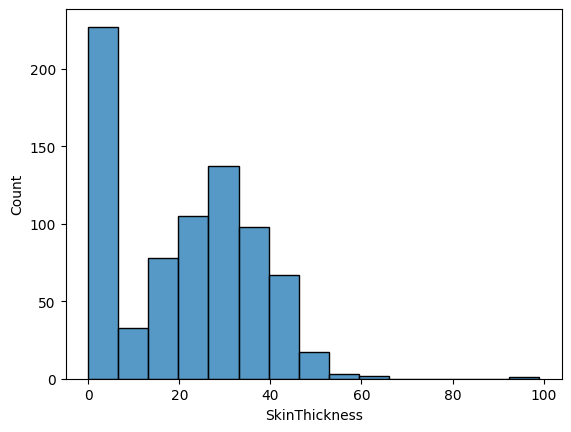

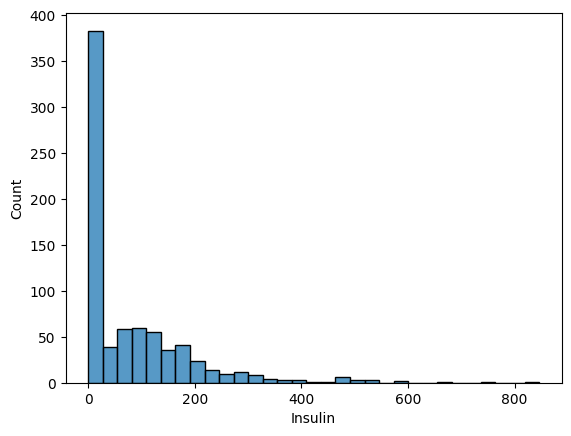

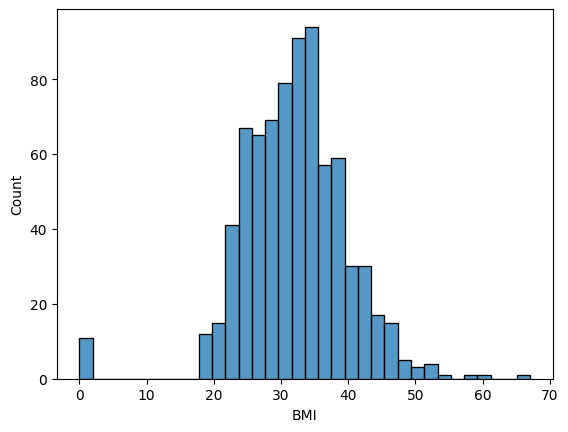

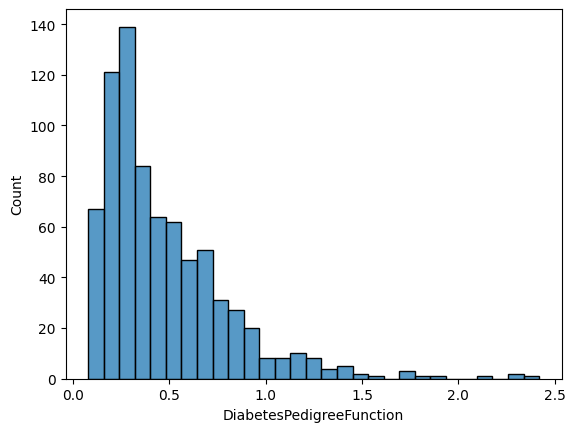

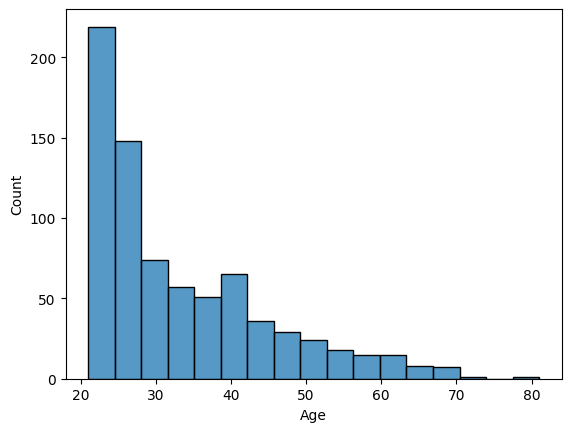

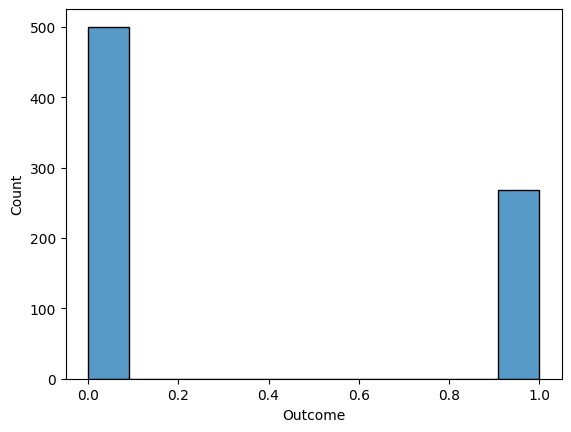

In [14]:
#lets process our data
df.isnull().sum()#checkmissing values
df.describe()

#historgram to visualize our distribution
num= df.select_dtypes(include='number')
for i in num.columns:
    sns.histplot(num, x=i)
    plt.show()


In [26]:
# 3. Define Features and Target Variable
# X is  BMI(the faeture we are going to use)
X = df[['BMI']]
# y is the MYSTERY we want to solve (diabetes score/ our target variable)
y = df[['Outcome']]

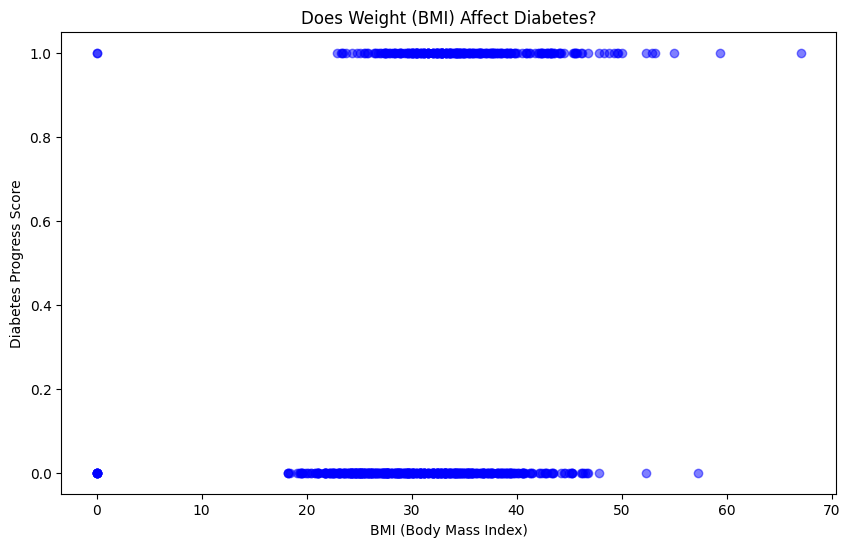

In [29]:
# 4. Exploratory Data Analysis (EDA)
# Let's draw a picture of our clues
#If the dots seem to form a pattern eg going up in a slanty line), it means our clue might be useful!
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, color='blue')
plt.title('Does Weight (BMI) Affect Diabetes?')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Diabetes Progress Score')
plt.show()

In [30]:
# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Practice Group (train)- We'll show this group to our robot assistant so it can learn the pattern. (This is 70% of the people).

Test Group (test)-  We'll hide this group from the robot. Later, we'll use it to see if the robot learned properly. (This is 30% of the people).

In [32]:
# 6. Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now we tell our robot assistant (LinearRegression())- "Hey robot, look at the Practice Group! Look at their BMI (the feature) and their Diabetes Score (the target variable). Try to find a pattern that connects them!" .Then robot studies hard and learns.

In [34]:
# 7. Model Evaluation - What did the robot learn?
print('The robot learned this rule:')
print('Diabetes Score = ', model.coef_[0], ' * BMI + ', model.intercept_)


The robot learned this rule:
Diabetes Score =  [0.02026962]  * BMI +  [-0.29804031]



In [36]:
# 8. Now let's test the robot on the hidden group!
predictions = model.predict(X_test)

print("Let's see how good the robot's guesses are:")
print('Average Mistake:', metrics.mean_absolute_error(y_test, predictions))
print('Score (1.0 is perfect):', metrics.r2_score(y_test, predictions))

Let's see how good the robot's guesses are:
Average Mistake: 0.4298617814773747
Score (1.0 is perfect): 0.03496471024038561


our model's score of 0.035 is like getting a very low grade. It means that just knowing someone's BMI doesn't really help the model much in guessing their diabetes score. There must be other important clues! like their BloodSugarCount(mmHg)etc



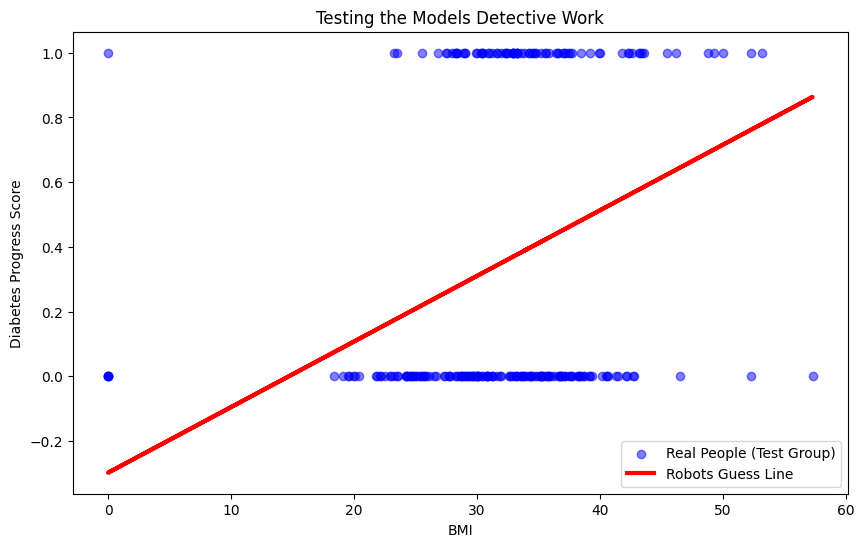

In [37]:
# 9. Visualization of Results
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Real People (Test Group)')
plt.plot(X_test, predictions, color='red', linewidth=3, label='Robots Guess Line')
plt.title('Testing the Models Detective Work')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progress Score')
plt.legend()
plt.show()

If the red line goes right through the middle of the blue dots, our robot is an awesome detective! If the dots are scattered everywhere, the pattern isn't very strong.

In [39]:
# 10. Let's make a prediction!
new_bmi = [[35.0]]  # What if someone has a BMI of 35?
predicted_score = model.predict(new_bmi)

print(f"If a person has a BMI of {new_bmi[0][0]},")
print(f"the robot predicts their diabetes score might be around {predicted_score[0][0]:.1f}")

If a person has a BMI of 35.0,
the robot predicts their diabetes score might be around 0.4
